## Garman-Klass Estimator of Volatility

The **Garman-Klass estimator** is a more efficient alternative to the classic close-to-close volatility estimator. It improves volatility estimation by incorporating **intraday information**, specifically the **high, low, open, and close** prices of each trading session.

---

### 🧠 Intuition

The goal of the Garman-Klass estimator is to provide a **more accurate estimate of daily volatility** under the assumption that prices follow a **continuous Brownian motion** with **zero drift** during the trading day.

It corrects a key limitation of the **Parkinson estimator**, which uses only the high and low prices, by also considering the **open and close prices** — allowing it to account for **intraday price drift** (i.e., directional movement from open to close).

---

### 📐 Formula

$$
\sigma_{\text{GK}} = \sqrt{ \frac{1}{N} \sum_{t=1}^{N} \left[ \frac{1}{2} \left( \ln\left( \frac{H_t}{L_t} \right) \right)^2 - \left( 2\ln(2) - 1 \right) \left( \ln\left( \frac{C_t}{O_t} \right) \right)^2 \right] }
$$

**Where, for each day $t$:**

- $H_t$: High price of the day  
- $L_t$: Low price of the day  
- $O_t$: Open price of the day  
- $C_t$: Close price of the day  
- $N$: Number of trading days  

---

### 🔍 Why does it use the open price?

Because it improves on Parkinson by capturing:

- **Range-based volatility** via $\ln(H_t / L_t)$  
- **Intraday drift** via $\ln(C_t / O_t)$  

Using the **open price** as a reference point allows the model to detect whether prices trend during the session, instead of simply oscillating around a flat level.

---

### ✅ Strengths

- **More efficient** than close-to-close and Parkinson estimators (lower estimation error)
- Uses **more information**: high, low, open, and close
- **Partially corrects for intraday drift**
- Ideal for **liquid instruments** with smooth continuous trading

---

### ⚠️ Limitations

- Assumes **zero drift and no jumps** within the day  
- Assumes **no overnight movement** — it **completely ignores overnight returns**  
- Not suitable if prices are affected by **large discrete jumps**, **microstructure noise**, or **news events outside trading hours**
- Like Parkinson, it can **underestimate total volatility** if overnight gaps are significant

---

### 📊 Use Cases

- Measuring **realized volatility** in equity and futures markets  
- Comparing intraday vs. overnight volatility (when used in decomposition)  
- Benchmarking models that assume continuous trading without jumps


The Garman-Klass estimator attempts to address the problems of close-to-close and parkinson estimators by combining closing prices and the intra-day extremes. It uses daily close, open, high and low prices. Let us calculate the volatility using the Garman-Klass estimator now. 

The notebook is structured as follows:
1. [Read the Data](#data)
2. [Calculate the Daily Volatility](#garman_klass)
3. [Calculate the Annualised Volatility](#annual)


## Import Libraries
You will import `pandas`, `numpy`, `seaborn`, and `matplotlib` for data manipulation and visualisations.

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

<a id='data'></a>
## Read the Data

You will fetch the SPDR S&P 500 ETF Trust (SPY) data from the file `spy_prices_2018_2023.csv` and store the price data in the dataframe `spy`. Further, you will print the bottom 5 rows of the dataset.

This data is available in the downloadable unit of this course in the last section. You can also download SPY index data  from finance.yahoo.com.

In [2]:
# Read the SPY index data
spy = pd.read_csv("../data_modules/spy_prices_2018_2023.csv", parse_dates=True, index_col=0)

# Print the bottom 5 rows of the dataframe
spy.tail()

,open,high,low,close,volume
date,,,,,
2023-04-24,411.989990,413.070007,410.600006,412.630005,64332100
2023-04-25,410.579987,411.160004,406.019989,406.079987,97766700
2023-04-26,406.720001,407.839996,403.779999,404.359985,80447000
2023-04-27,407.000000,412.690002,406.739990,412.410004,92968400
2023-04-28,411.489990,415.940002,411.429993,415.929993,89335600


<a id='garman_klass'></a>
## Calculate the Daily Volatility

You will first calculate the daily volatility using the Garman-Klass Estimator formula. 

The formula is given below:

$$
\sigma_{\text{GK}} = \sqrt{ \frac{1}{N} \sum_{t=1}^{N} \left[ \frac{1}{2} \left( \ln\left( \frac{H_t}{L_t} \right) \right)^2 - \left( 2\ln(2) - 1 \right) \left( \ln\left( \frac{C_t}{O_t} \right) \right)^2 \right] }
$$

**Where, for each day $t$:**
- $H_t$: High price of the day  
- $L_t$: Low price of the day  
- $O_t$: Open price of the day
- $C_t$: Close price of the day  
- $N$: Number of trading days in the sample  

As you can see, the Garman-Klass estimator uses the `high`, `low` and `close` values of the asset as its components. Hence, you will calculate the log value of the high price divided by the low price of the day and also the log value of the current close and previous close. You will make use of the `numpy` library for computing these values. The log values are stored in the DataFrame `spy` under the column headers `high_low` and `curr_prev`.

In [ ]:
# Calculate log values of high divided by low price
spy['high_low'] = np.log(spy['high']/spy['low'])

# Calculate log values of current close divided by previous close
spy['curr_prev'] = np.log(spy['close']/spy['open'])

Now that we have calculated the log values, let us move forward towards the calculation of daily volatility.
The number of observations (N) is taken as 20 as it is neither too low for the data to be noisy, or too high for the data to become less relevant. You will divide the result by 100 to measure it in percentage terms, i.e. from 0 to 100 and above, instead of 0 to 1 and above.
The daily volatility values using the Garman-Klass estimator will be stored under the column header `garman_klass_estimator`.

In [4]:
# Initialise number of observations to be taken
n = 20

# Calculating the Garman-Klass Estimator Values
spy['garman_klass_estimator'] = np.sqrt((1 / (2 * n)) * ((spy['high_low']**2).rolling(window=n).sum()) - 
                                        ((1 / n) * (2 * np.log(2) - 1) * (((spy['curr_prev'])**2).rolling(window=n).sum()))) * 100

## Plot the volatility
You will now plot the daily volatility using Garman-Klass Estimator values to visualise how it changes over the period.

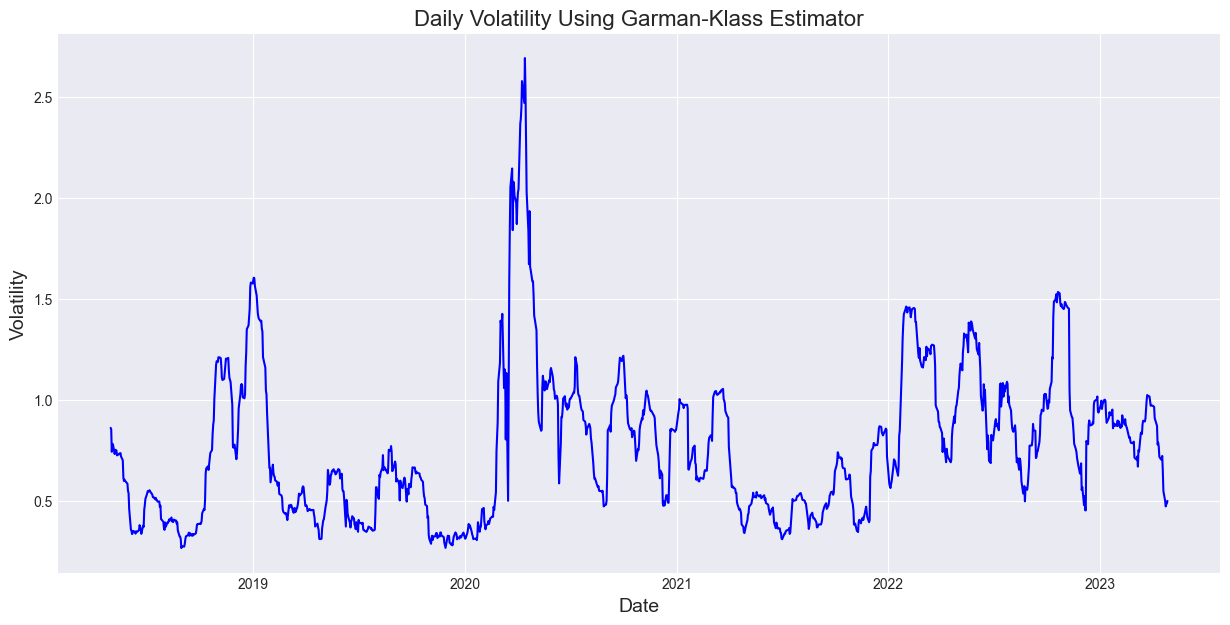

In [5]:
# Set the plot size
plt.figure(figsize=(15, 7))

# Plot the daily volatility values
plt.plot(spy['garman_klass_estimator'], color='b')

# Initialise the x-axis label
plt.xlabel('Date', fontsize=14)

# Initialise the y-axis label
plt.ylabel('Volatility', fontsize=14)

# Initialise the title of the plot
plt.title('Daily Volatility Using Garman-Klass Estimator', fontsize=16)

# Plot the graph
plt.show()

You can see the daily volatility values ranges from 0.25% to 2.75%. The sharp spike seen in March 2020 is due to COVID-19 Pandemic declaration. Let us annualise the daily volatility now.

<a id='annual'></a>
## Calculate the Annualised Garman-Klass Estimator Values

You can annualise the daily volatility values by multiplying the daily values with the square root of the number of trading days in a year, which is assumed to be 252.

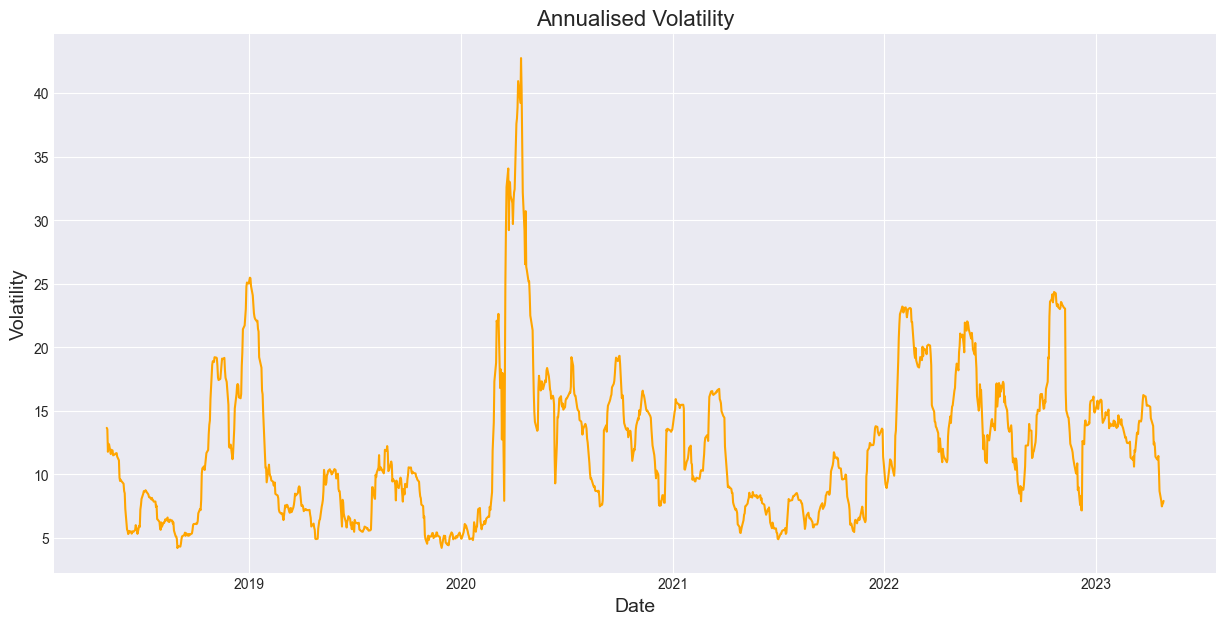

In [6]:
# Calculate the annualised volatility
spy['annualised_garman_klass_estimator'] = spy['garman_klass_estimator']*np.sqrt(252)

# Plot the annualised volatility
plt.figure(figsize=(15,7))
plt.plot(spy['annualised_garman_klass_estimator'], color = 'orange')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Volatility',fontsize = 14)
plt.title('Annualised Volatility',fontsize = 16)
plt.xticks()
plt.show()

If you remember, the annualised volatility calculated using the Parkinson estimator was around 58% on March 2020 in comparison to the 45% value using Garman-Klass estimator.

<a id='conclusion'></a>
## Conclusion

You have calculated the daily and annualised volatility values using Garman-Klass estimator. You have also seen how the volatility is lower than the volatility calculated using Parkinson estimator. You can tweak the number of time periods and see how the volatility changes. In the next section, you will compare all the three volatility estimators.<br><br>